In [167]:

import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd

ff1.Cache.enable_cache('../cache')

In [168]:
year = 2022
gp_round = 'Miami'
ses = 'FP2'

In [169]:
session = ff1.get_session(year, gp_round, ses)
laps = race.load_laps(with_telemetry=True)

/home/adrien/anaconda3/lib/python3.9/site-packages/fastf1/core.py:1127: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Miami Grand Prix - Practice 2 [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
core        WARNING 	No lap data for driver 77
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 dri

In [170]:
driver_stints = laps[['DriverNumber', 'Stint', 'Compound', 'LapNumber']].groupby(
    ['DriverNumber', 'Stint', 'Compound']
).count().reset_index()

In [171]:
driver_stints = driver_stints.rename(columns={'LapNumber': 'StintLength'})
driver_stints = driver_stints.sort_values(by=['Stint'])

In [172]:

compound_colors = {
    'SOFT': '#FF3333',
    'MEDIUM': '#FFF200',
    'HARD': '#EBEBEB',
    'INTERMEDIATE': '#39B54A',
    'WET': '#00AEEF',
}

In [176]:

def fastest_lap_comparison(driver_stints):

    fig, ax = plt.subplots()
    fig.patch.set_facecolor('#111111')
    plt.set_loglevel('WARNING')
    plt.rcParams["figure.figsize"] = [15, 10]

    for driver in  race.results.DriverNumber:
        stints = driver_stints.loc[driver_stints['DriverNumber'] == driver]
    
        previous_stint_end = 0
        for _, stint in stints.iterrows():
            plt.barh(
                [driver], 
                stint['StintLength'], 
                left=previous_stint_end, 
                color=compound_colors[stint['Compound']], 
                edgecolor = "black"
            )
        
            previous_stint_end = previous_stint_end + stint['StintLength']
        

    plt.title(f'Compound during the session : {session} on {circuit} in {year}')
    plt.xlabel('Lap')
    plt.gca().invert_yaxis()

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    return fig


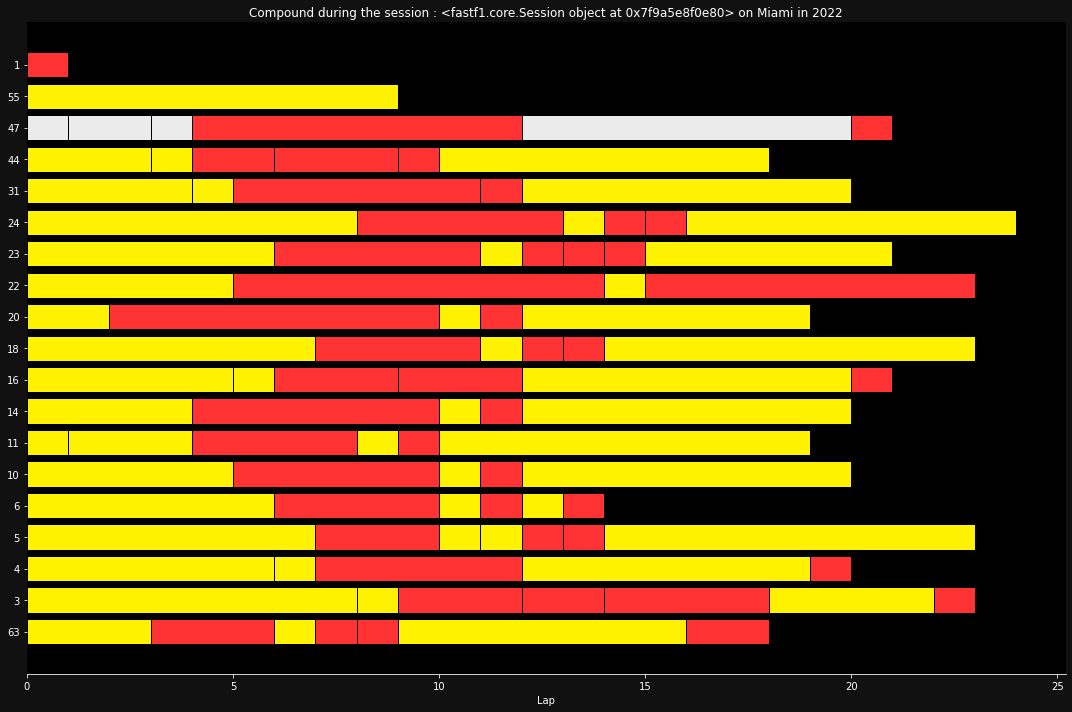

In [177]:
fig